image visualization

In [131]:
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches
import numpy as np

import os

In [132]:
labels = {0:'Single Helmet',1:'Single No Helmet',2:'Shared Helmet',3:'Shared No Helmet',}
label_colors = {0:'black',1:'darkcyan',2:'sienna',3:'gray',}

In [133]:
def get_bboxes(ann_path: str):
    f = open(ann_path)
    data = json.load(f)
    bboxes=[]
    for annotation in data['objects']:
        label_id = annotation['classTitle']
        coor = annotation['points']['exterior']
        bboxes.append({'coor': coor, 'label': label_id})
    return bboxes


In [134]:
def vis_img(img_path: str, ann_path: str):

    bboxes = get_bboxes(ann_path)
    fig, ax = plt.subplots(1,1,figsize=(10,10))

    im = np.array(Image.open(img_path), dtype = np.uint8)
    ax.imshow(im)
    ax.set_title("Prediction", fontsize = 25)
    for bbox in bboxes:
        print(bbox)
        rect = patches.Rectangle((float(bbox['coor'][0][0]), float(bbox['coor'][0][1])), 
        float(bbox['coor'][1][0])-float(bbox['coor'][0][0]),float(bbox['coor'][1][1])-float(bbox['coor'][0][1]), 
        linewidth=2, edgecolor=label_colors[int(bbox['label'])], facecolor='none')
        ax.text(float(bbox['coor'][0][0]),float(bbox['coor'][0][1]),s=labels[int(bbox['label'])],
                color='white',
                backgroundcolor=label_colors[int(bbox['label'])],
                )
        ax.add_patch(rect)

In [135]:
ind = [x for x in range(4000)]
i = iter(enumerate(ind))

{'coor': [[463, 55], [711, 817]], 'label': '1'}


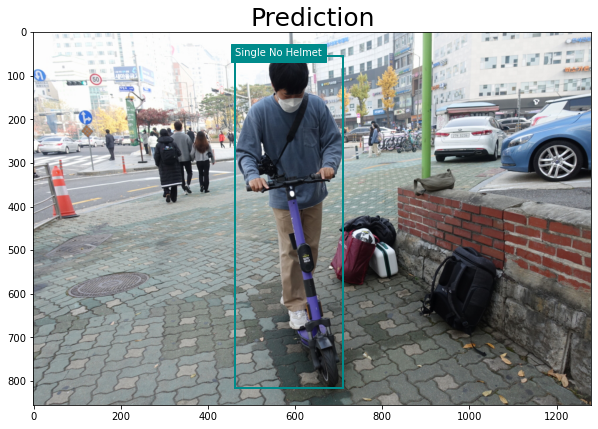

In [136]:
idx = next(i)[0]
num = str(idx).zfill(4)
vis_img(f'Project/self/img/self_{num}.JPG', f'Project/self/ann/self_{num}.JPG.json')